**<h1> Activity 8: Machine Learning**


---


**<h1> Part A:** Feature Engineering
<br><br>CAN YOU TELL IF A POST IS FROM E-JEAB OR DRAMA-ADDICT?</h1>
In this part, We will create post classification program to classify which is from E-JEAB or which post is from Drama-Addict. Find \<YOUR CODE HERE> symbol to edit code. <br>
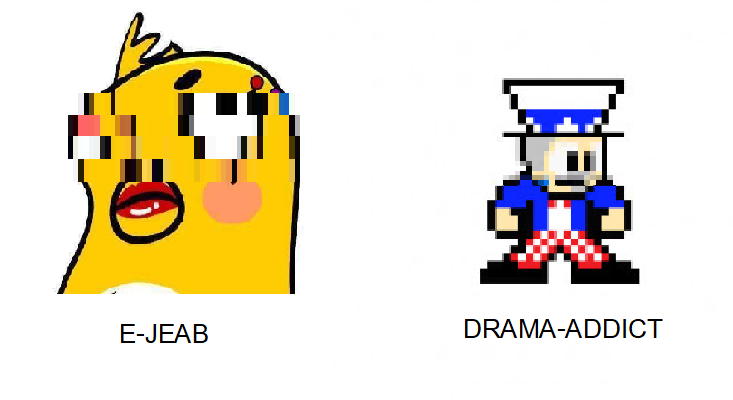

<h2>1. Import Module. </h2>

In [ ]:
from sklearn import tree
import graphviz
import pandas as pd

<h2>2. Import Data.</2>

In [ ]:
!wget https://raw.githubusercontent.com/peerawatchomp/com-eng-ess-activitiy8/main/Activity9-1-Feature-Engineering/dramaadd_ejeab.csv

In [ ]:
data = pd.read_csv('dramaadd_ejeab.csv')

In [ ]:
data.head(5)

<h2>3. Feature Selection </h2>

  3.1 Find the average share per post of each pages.

In [ ]:
def averageShare(df):
  summary = (
      df[['num_shares', 'page']]
          .groupby('page') \
          .mean()
  )

  print('Average shares per post from each page: \n')
  print(summary)

In [ ]:
averageShare(data)

***Q1:*** Given a post with 500 shares, which page is it more likely to come from?<br>
***Answer:*** <font color=red> (Answeer in your woksheet.)

 3.2 Find the average posts published by each page at each hour of the day.

In [ ]:
def postEachOur(df):
  print('Percentage of posts published by each page at each hour of the day: \n')
  summary = (
      df[['page', 'hour_published']]
          .groupby(['hour_published', 'page'])
          .size()
          .groupby(level=0)
          .apply(lambda x: 100 * x / float(x.sum()))
  )
  print(summary)

In [ ]:
postEachOur(data)

***Q2:*** Given a post published at 20:30, which page is it more likely to come from?<br>
***Answer:*** <font color=red> (Answeer in your woksheet.)

 3.3 Find the average Lenght per post of each pages.

In [ ]:
def averageLenght(df):
    print('Average message length by page: \n')
    summary = (
        df[['page', 'message_length']]
            .groupby('page')
            .mean()
    )
    print(summary)

In [ ]:
averageLenght(data)

***Q3:*** Given a post with 140 characters, which page is it more likely to come from?<br>
***Answer:*** <font color=red> (Answeer in your woksheet.)

Alright, those are the basic features we already put into the model for you! 
        To improve the model further, we want you to come up with a set of characters/words/phrases that may help distinguish posts from the two pages.

3.4 Find characters/words/phrases that may help distinguish posts from the two pages.

In [ ]:
def wordEachPage(df, word):
  df['feature'] = df['message'].str.contains(word)
  summary = (
      df[['feature', 'page']]
          .query('feature')
          .groupby('page')
          .size()
  )
  total = summary.sum()
  summary = summary * 100.0 / total
  print()
  print(summary)
  print('\nTotal number of posts containing %s: %d\n' % (word, total))

In [ ]:
############# <YOUR CODE HERE> ##############
# Use wordEachPage function to help you find word features
word = 'แมว'
############ <END OF YOUR CODE> #############
wordEachPage(data, word)


<h1>4. Train Model </h1>

Building machine learning model includes 3 steps.
1. prepare data: Split data into train and test set. Then select features.
2. train model: fit [Decision Tree](https://medium.com/swlh/decision-tree-cb7cc0f46633) model with training data.
3. test model: validate model with unseen data.

In [ ]:
def prepare(df, word_features):
    tmp_df = df.copy()
    print('word_features: ', word_features)
    for w in word_features:
        if w != '':
            tmp_df['has_%s' % w] = tmp_df.message.str.contains(w.strip())

    # Label = True if a post is from Drama Addict
    Y = tmp_df.page == 'dramaadd'
    X = tmp_df[['num_shares', 'hour_published', 'message_length']]
    X = pd.concat([X, tmp_df.filter(regex='^has_')], axis=1)
    # X = df.filter(regex='^has_')

    Y_train = Y[tmp_df.year_published == 2016]
    Y_test = Y[tmp_df.year_published == 2017]
    X_train = X[tmp_df.year_published == 2016]
    X_test = X[tmp_df.year_published == 2017]

    return Y_train, Y_test, X_train, X_test

In [ ]:
def train(X, Y):
    model = tree.DecisionTreeClassifier(
        min_samples_split=30,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=99
    )
    model = model.fit(X, Y)
    train_score = model.score(X, Y) * 100
    print('Train Accuracy: %.2f%% \n' % train_score)

    feature_importances = (
        pd.DataFrame({
            'features': X.columns,
            'feature_importances': model.feature_importances_
        }, columns=['features', 'feature_importances'])
        .sort_values('feature_importances', ascending=False)
    )
    print(feature_importances)
    graph = tree.export_graphviz(
        model,
        out_file=None,
        feature_names=X.columns,
        class_names=['E-Jeab', 'Drama-Addict'],
        filled=True,
        rounded=True
    )
    # $ dot -Tpng tree.dot -o tree.png

    graph = graphviz.Source(graph)
    graph.render('tree', format='svg')
    print('\ntree.pdf has been created.')

    return model

In [ ]:
def test(X, Y, model):
    print('Here\'s the performance of your model on another data set we have set aside for evaluation:\n')

    test_score = model.score(X, Y) * 100
    print('Test Accuracy: %.2f%%' % test_score)

In [ ]:
def trainWithWords(df, word_features):
    # Prepare Dataset
    Y_train, Y_test, X_train, X_test = prepare(df, word_features)

    # Training
    model = train(X_train, Y_train)

    # Testing
    test(X_test, Y_test, model)

List words, Thai or English, you want to include in the features of model. (e.g. ['หมู', 'หมา', 'กา', 'ไก่'])

In [ ]:
############# <YOUR CODE HERE> ##############
# Select word feature of model. to increase Test accuracy
word_features = ['หมา', 'แมว', 'coffee']
############ <END OF YOUR CODE> #############
trainWithWords(data, word_features)

Use the result from above cell to answer Q4 to Q6.

***Q4:*** Discuss how you come up with the list of words.<br>
***Answer:*** <font color=red> (Answeer in your woksheet.)

***Q5:*** Write down your final list of words together with their feature importances and the training accuracy. Also include a screenshot of the training result.<br>
***Answer:*** <font color=red> (Answeer in your woksheet.)

***Q6:*** Write down your test accuracy, also include a screenshot of the testing result. Discuss how it differs from the training accuracy. <br>
***Answer:*** <font color=red> (Answeer in your woksheet.)

<h1>5. Vitualize Model </h1>
After finnish trainning process, the file 'tree.svg' will appear in file directory of google colab. You can download this file to your computer to see the structure of Decision Tree Model.

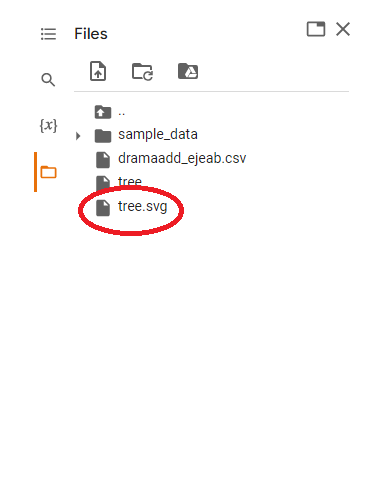

***Q7:*** There will be the “tree.svg” created in file directory of google colab. Upload it to Google Drive and put the link here. <br>
***Answer:*** <font color=red> (Answeer in your woksheet.)